#El problema de la salida estrecha:

# Determinación de la distribución de probabilidad del tiempo de escape de una partícula con movimiento borwniano usando el método Montecarlo.

### Alejandro Valencia Ossa
### Fabian Yamith Tovar Altahona

In [ ]:
import numpy as np
from math import*
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import statistics as stats
from scipy.interpolate import CubicSpline
from scipy.optimize import curve_fit

In [ ]:
t=10000
x=[0]
y=[0]
z=[0]
for i in range(t):
  a=np.random.uniform(-1,1)
  x.append(x[i]+a)
  b=np.random.uniform(-1,1)
  y.append(y[i]+b)
  c=np.random.uniform(-1,1)
  z.append(z[i]+c)

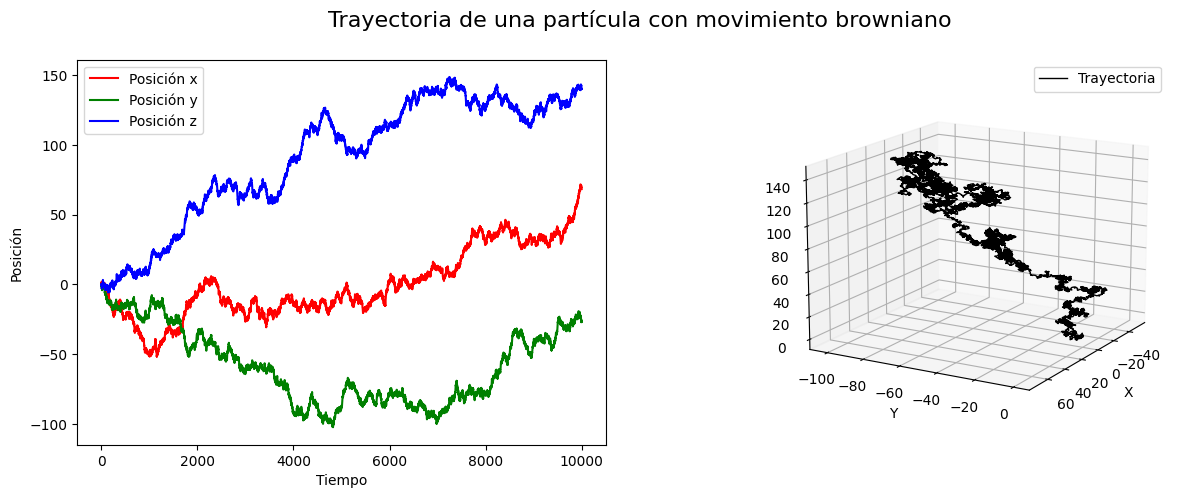

In [ ]:
fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(121)
ax1.plot(x,label="Posición x",color="red")
ax1.plot(y,label="Posición y",color="green")
ax1.plot(z,label="Posición z",color="blue")
plt.xlabel("Tiempo")
plt.ylabel("Posición")
plt.legend()

ax2= fig.add_subplot(122, projection='3d')
ax2.plot(x,y,z,color="black",label="Trayectoria",lw=1)
ax2.view_init(elev=15, azim=30)
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

fig.suptitle("Trayectoria de una partícula con movimiento browniano", fontsize=16)
plt.show()

In [ ]:
class Particula:
  def __init__(self,R,a,paso):
    self.R=R
    self.a=a
    self.paso=paso

  def trayectoria(self):
    x=[0]
    y=[0]
    r=0
    i=0
    while (r<=self.R) or (x[i]>=self.a):
       pasox=self.paso*np.random.uniform(-1,1)
       x.append(x[i]+pasox)
       pasoy=self.paso*np.random.uniform(-1,1)
       y.append(y[i]+pasoy)
       if ((((x[-1])**2)+((y[-1])**2))**(1/2)>self.R) and (x[i]>=self.a):
         x.pop()
         y.pop()
         i=i-1
       r=(((x[-1])**2)+((y[-1])**2))**(1/2)
       i=i+1

    return x,y,i

  def trayectorialibre(self):
    x=[0]
    y=[0]
    r=0
    i=0
    while r<=self.R:
       pasox=self.paso*np.random.uniform(-1,1)
       x.append(x[i]+pasox)
       pasoy=self.paso*np.random.uniform(-1,1)
       y.append(y[i]+pasoy)
       r=(((x[-1])**2)+((y[-1])**2))**(1/2)
       i=i+1
    return x,y

  def region(self,ángulo):
    t=np.linspace(-ángulo,ángulo,1000)
    regionx=[]
    regiony=[]

    for angle in t:
        regionx.append((self.R)*np.cos(angle))
        regiony.append((self.R)*np.sin(angle))

    return regionx,regiony

  def regionabertura(self):
    t=np.linspace(np.arccos(abs(self.a)/self.R)-np.pi,np.pi-np.arccos((abs(self.a))/self.R),1000)
    regionx=[]
    regiony=[]

    for angle in t:
        regionx.append((self.R)*np.cos(angle))
        regiony.append((self.R)*np.sin(angle))


    return regionx,regiony

  def grafica(self):
    regionx,regiony=self.regionabertura()

    x,y,i=self.trayectoria()
    plt.figure(figsize=(6,6))
    plt.plot(regionx,regiony,"-",lw=2,color="black",label="Región")
    plt.plot(x,y,"o--",lw=0.75,color="blue",markersize=4*self.paso,label="Trayectoria seguida por la partícula")
    plt.xlabel("X (µm)\n$Tiempo$ $empleado$ $para$ $salir$ $de$ $la$ región: %s s\n $Longitud$ $de$ abertura: %s µm"%(i,round(2*((self.R**2-(self.a**2))**(1/2)),5)))
    plt.ylabel("Y (µm)")
    plt.title("Trayectoria de la partícula hasta que sale de la región acotada")
    plt.legend(loc=1)
    plt.show()

  def graficalibre(self):
    t=np.linspace(-np.pi,np.pi,1000)
    regionx=[]
    regiony=[]

    for angle in t:
        regionx.append((self.R)*np.cos(angle))
        regiony.append((self.R)*np.sin(angle))

    x,y=self.trayectorialibre()
    plt.figure(figsize=(6,6))
    plt.plot(regionx,regiony,"-",lw=2,color="black",label="Región acotada")
    plt.plot(x,y,"o--",lw=0.75,color="blue",markersize=4*self.paso,label="Trayectoria")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Trayectoria de una partícula en una región acotada (sin restricciones)")
    plt.legend(loc=1)
    plt.show()

Nuestro experimento consiste en una partícula con movimiento browniano dentro de una región circular que originalmente se encuentra en la posición $(x,y)=(0,0)$. En el tiempo $t=0$  la partícula comienza a moverse. El experimento se detiene cuando la partícula abandona la región.

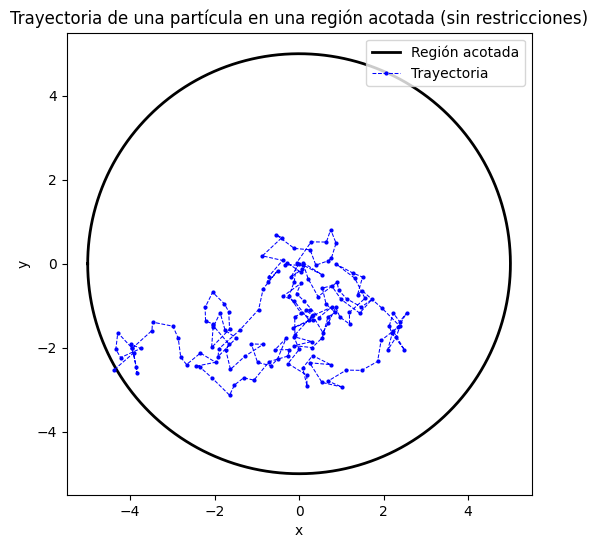

In [ ]:
R=5 #Radio de la región
a=-4.75 # Coordenada en el eje x de la abertura
s=0.5 #Tamaño de la partícula

part=Particula(R,a,s)
part.graficalibre()

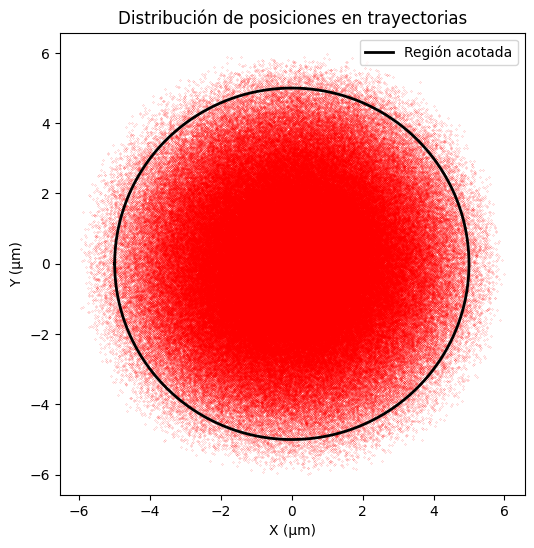

In [ ]:
N=10000
R=5
a=-4.75


part=Particula(R,a,1)

distribuciónx=[]
distribucióny=[]
for i in range(N):
    x,y=part.trayectorialibre()
    for j in range(len(x)):
        distribuciónx.append(x[j])
        distribucióny.append(y[j])

regionx,regiony=part.region(np.pi)

plt.figure(figsize=(6,6))
plt.plot(distribuciónx,distribucióny,"o",color="red",markersize=0.1)
plt.plot(regionx,regiony,"-",lw=2,color="black",label="Región acotada")
plt.xlabel("X (µm)")
plt.ylabel("Y (µm)")
plt.title("Distribución de posiciones en trayectorias")
plt.legend(loc=1)
plt.show()


Imponemos la restricción de que la partícula sólo puede abandonar la región a través de una pequeña abertura. Este problema se denomina el problema de la salida estrecha. Es un experimento con aplicaciones en biología, biofísica y biología celular, ya que puede simular el proceso en el cual una partícula con movimiento browniano (un ion, una molécula o una proteína) está confinada a un dominio delimitado (un compartimento o una célula) y solo puede escapar por una pequeña abertura.

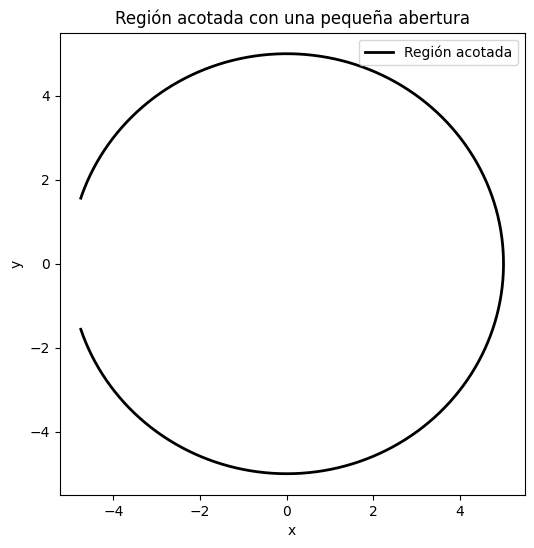

In [ ]:
part=Particula(5,-4.75,0.5)
regionx,regiony=part.regionabertura()
plt.figure(figsize=(6,6))
plt.plot(regionx,regiony,"-",lw=2,color="black",label="Región acotada")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Región acotada con una pequeña abertura")
plt.legend(loc=1)
plt.show()

###Ejemplo de una trayectoria.

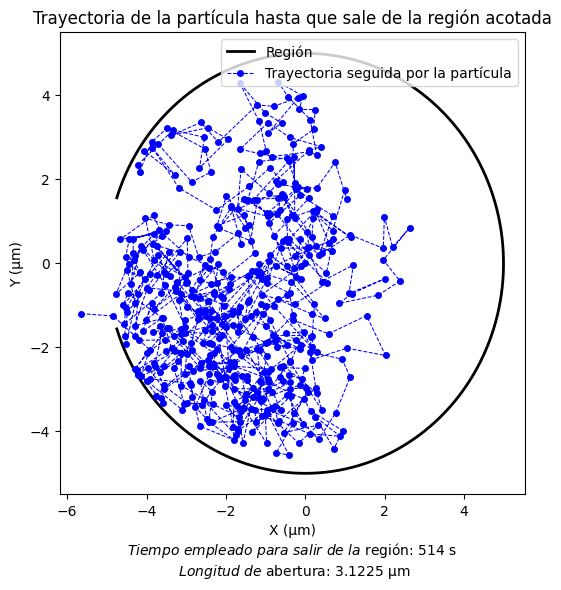

In [ ]:
R=5 #Radio de la región
a=-4.75 # Coordenada en el eje x de la abertura
s=1 #Tamaño de la partícula

part=Particula(R,a,s)
part.grafica()

###Ejemplo para una partícula más pequeña

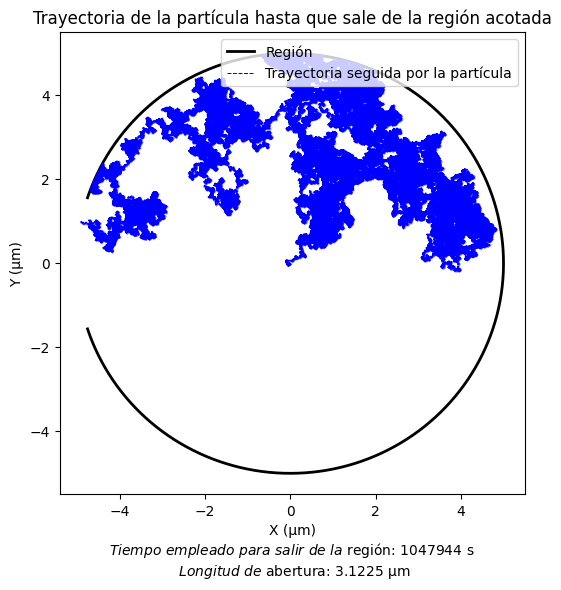

In [ ]:
R=5 #Radio de la región
a=-4.75 # Coordenada en el eje x de la abertura
s=0.01 #Tamaño de la partícula

part=Particula(R,a,s)
part.grafica()

###Ejemplos para distintos tamaños de partícula

In [ ]:
tamaños=[0.01,0.1,0.5,1]

parx=[]
pary=[]
for i in range(4):
  part=Particula(R,a,tamaños[i])
  x,y,k=part.trayectoria()
  parx.append(x)
  pary.append(y)

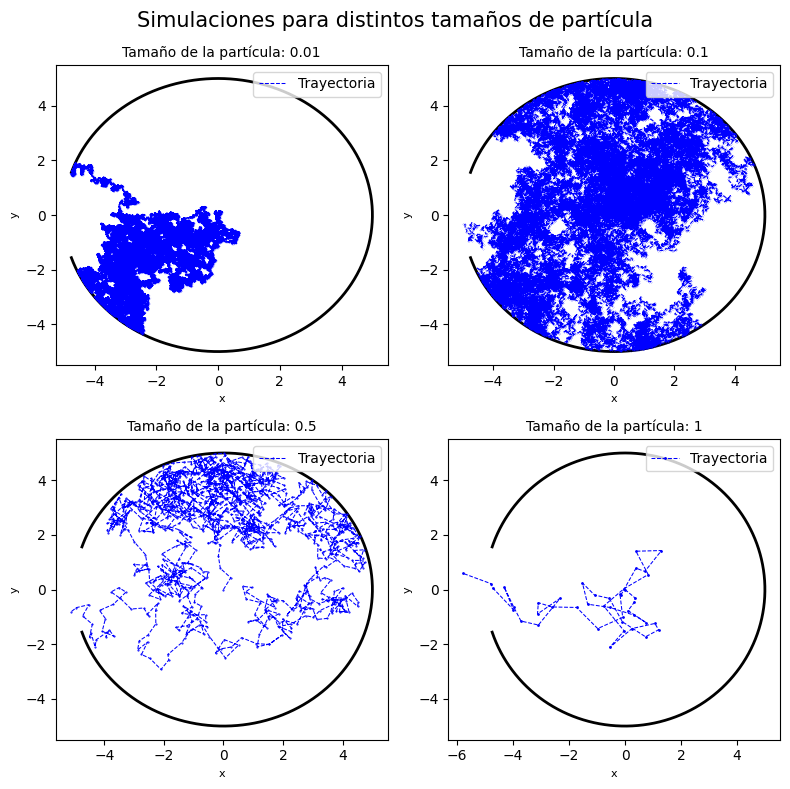

In [ ]:
a=-4.75
R=5

regionx,regiony=part.regionabertura()

plt.figure(figsize=(8,8))
plt.suptitle(f"Simulaciones para distintos tamaños de partícula",fontsize=15)
for i in range(4):
  plt.subplot(2,2,i+1)
  plt.title(f"Tamaño de la partícula: {tamaños[i]}",fontsize=10)
  plt.plot(regionx,regiony,"-",lw=2,color="black")
  plt.plot(parx[i],pary[i],"o--",lw=0.75,color="blue",markersize=1*tamaños[i],label="Trayectoria")
  plt.xlabel("x",fontsize=8)
  plt.ylabel("y",fontsize=8)
  plt.legend(loc=1)
  plt.tight_layout()

plt.show()

##Simulación Montecarlo para calcular la distribución de probabilidad

Usamos el método Montecarlo para realizar 10000 simulaciones del experimento con parámetros fijos (radio de la región, ancho de la abertura y tamaño de la partícula). Almacenamos los tiempos de escape y los graficamos en un histograma.

In [ ]:
tiempo=[]

R=5 #Parámetros fijos
a=-4.75
s=1

N=10000 #Número de iteraciones Montecarlo

part=Particula(R,a,s)
for i in range(N):
  x,y,i=part.trayectoria()
  tiempo.append(i)

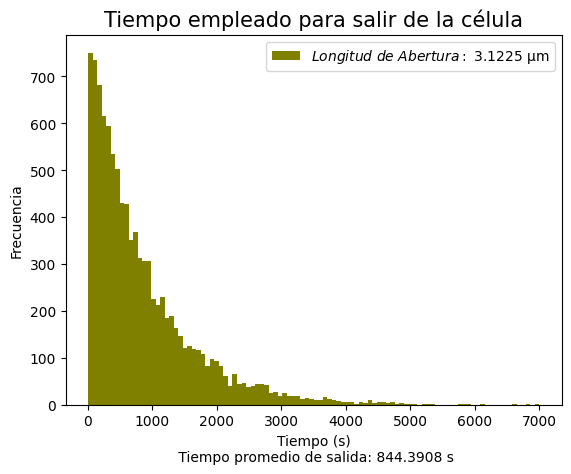

In [ ]:
plt.hist(tiempo,bins=100,color="olive",label="$Longitud$ $de$ $Abertura:$ %s µm"%round(2*((R**2-(a**2))**(1/2)),5))
plt.xlabel("Tiempo (s)\n Tiempo promedio de salida: %s s"%(stats.mean(tiempo)))
plt.ylabel("Frecuencia")
plt.legend()
plt.title("Tiempo empleado para salir de la célula",fontsize=15)
plt.show()

### Simulación Montecarlo para distintos anchos de abertura

In [ ]:
tiempos=[]
aberturas=[-4.75,-4.7,-4.6,-4.5]
R=5
N=10000
tiempos=[]
for i in range(len(aberturas)):
  part=Particula(R,aberturas[i],1)
  tiempo=[]
  for c in range(N):
    x,y,i=part.trayectoria()
    tiempo.append(i)
  tiempos.append(tiempo)

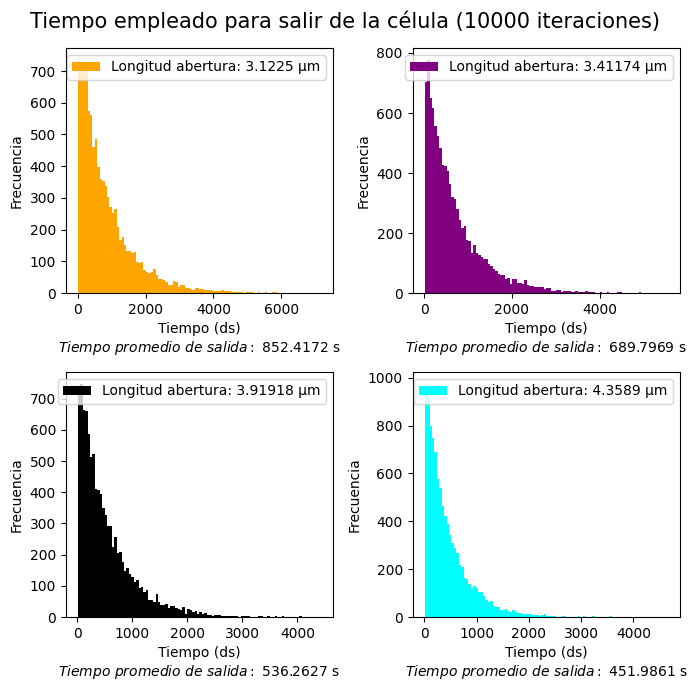

In [ ]:
colores=["orange","purple","black","cyan"]
plt.figure(figsize=(7,7))
plt.suptitle(f"Tiempo empleado para salir de la célula ({N} iteraciones)",fontsize=15)
for i in range(4):
  plt.subplot(2,2,i+1)
  plt.hist(tiempos[i],bins=100,color=colores[i])
  plt.xlabel("Tiempo (ds)\n$Tiempo$ $promedio$ $de$ $salida:$ %s s"%(stats.mean(tiempos[i])))
  plt.ylabel("Frecuencia")
  plt.legend(["Longitud abertura: %s µm"%(round(2*((R**2-(aberturas[i]**2))**(1/2)),5))])
  plt.tight_layout()

plt.show()

con base en las simulaciones Montecarlo anteriores, para distintos anchos de abertura podemos obtener una distribución de probabilidad estimada para el tiempo de escape para cada ancho.

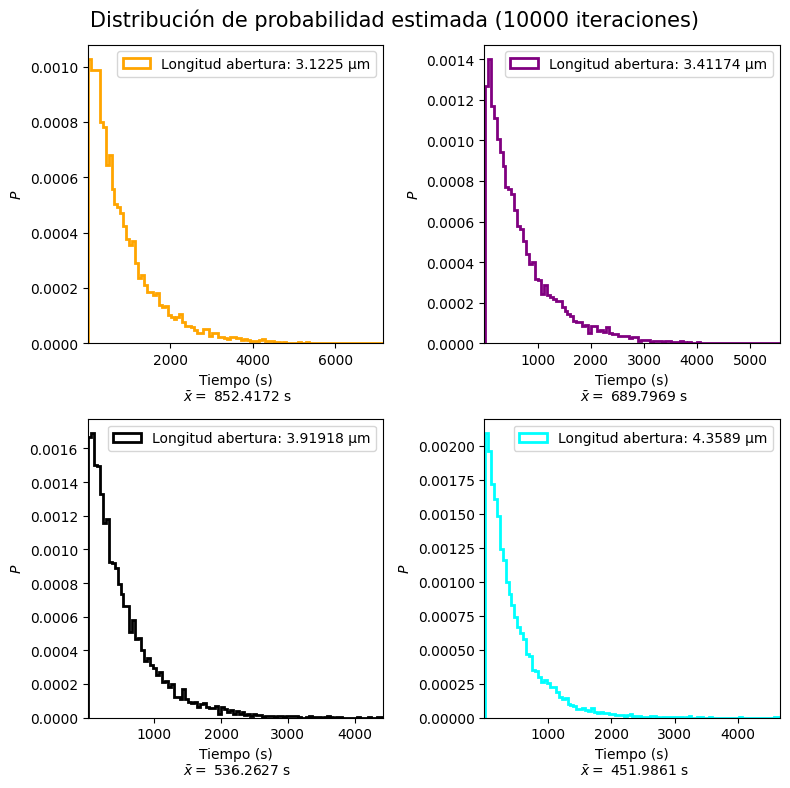

In [ ]:
colores=["orange","purple","black","cyan"]
plt.figure(figsize=(8,8))
plt.suptitle(f"Distribución de probabilidad estimada ({N} iteraciones)",fontsize=15)
for i in range(4):
  plt.subplot(2,2,i+1)
  plt.hist(tiempos[i],bins=100,color=colores[i],density=True,histtype="step",lw=2)
  plt.xlabel("Tiempo (s)" + "\n "+r"$\bar{x}=$ %s s" %stats.mean(tiempos[i]))
  plt.ylabel("$P$")
  plt.xlim(1,max(tiempos[i]))
  plt.legend(["Longitud abertura: %s µm"%(round(2*((R**2-(aberturas[i]**2))**(1/2)),5))])
  plt.tight_layout()

plt.show()

Graficamos la distribución de probabilidad acumulada a partir de la disttribución estimada.

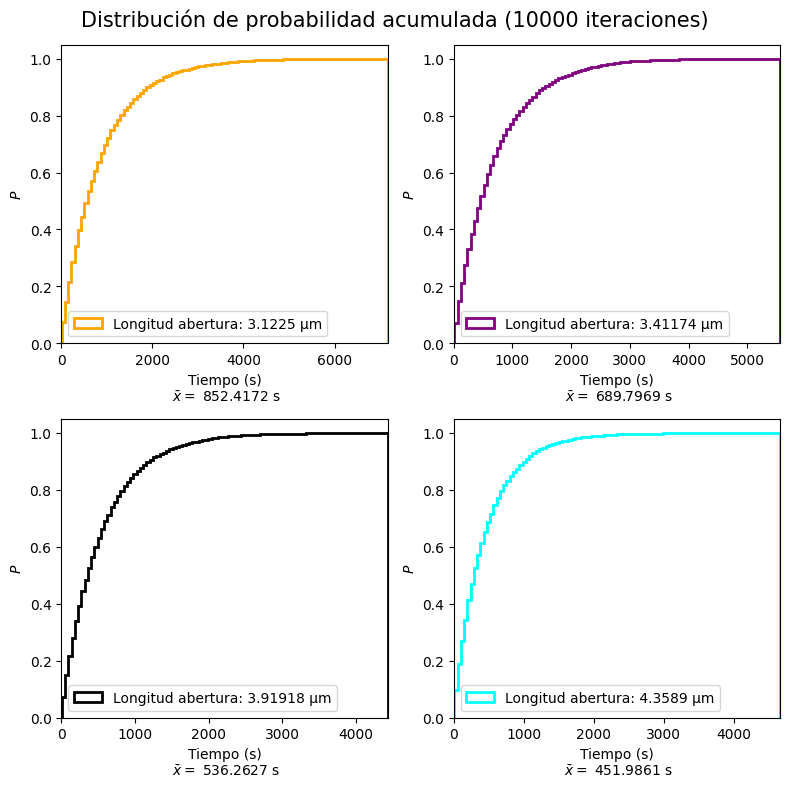

In [ ]:
colores=["orange","purple","black","cyan"]
plt.figure(figsize=(8,8))
plt.suptitle(f"Distribución de probabilidad acumulada ({N} iteraciones)",fontsize=15)
for i in range(4):
  plt.subplot(2,2,i+1)
  plt.hist(tiempos[i],bins=100,color=colores[i],density=True,cumulative=True,histtype="step",lw=2)
  plt.xlabel("Tiempo (s)" + "\n "+r"$\bar{x}=$ %s s" %stats.mean(tiempos[i]))
  plt.ylabel("$P$")
  plt.xlim(0,max(tiempos[i]))
  plt.legend(["Longitud abertura: %s µm"%(round(2*((R**2-(aberturas[i]**2))**(1/2)),5))])
  plt.tight_layout()

plt.show()

Los datos parecen ajustarse a una distribución exponencial ($\lambda e^{-\lambda t}$). El parametro $\lambda$ de la districución exponencial es igual al inverso de la media $\mu$ de la distribución. Por lo tanto, si estos datos provienen de una distribución exponencial se espera que el parámetro exponencial de dicha distribución sea cercano al inverso del promedio $\bar X$ de los datos.

Al solapar nuestra distribución de probabilidad estimada con una distribución exponencial de parámetro $\bar X^{-1}$, notamos que ambas coinciden gráficamente casi a la perfección.

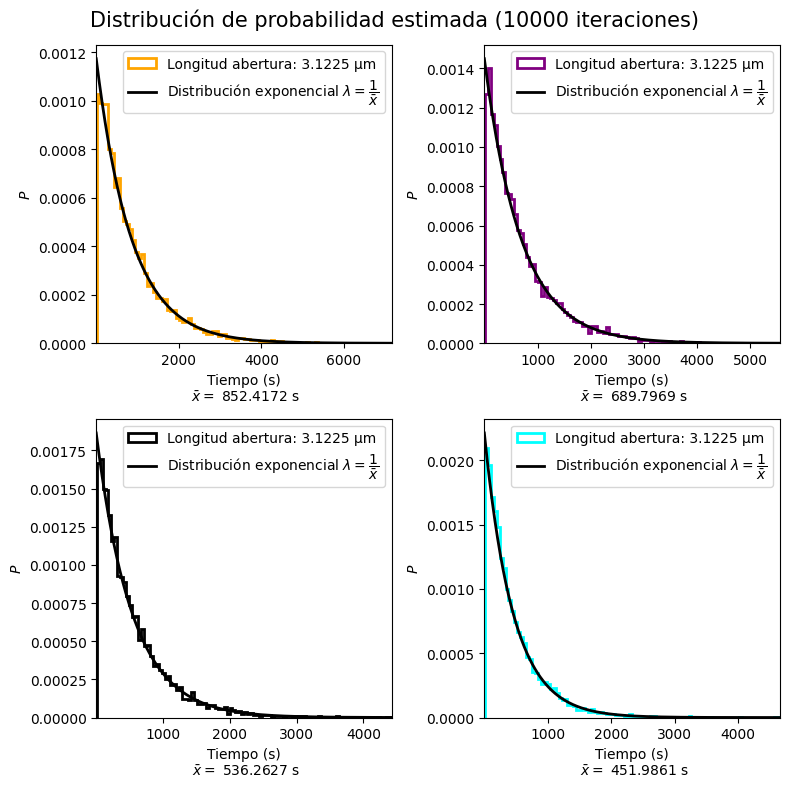

In [ ]:
colores=["orange","purple","black","cyan"]
plt.figure(figsize=(8,8))
plt.suptitle(f"Distribución de probabilidad estimada ({N} iteraciones)",fontsize=15)
for i in range(4):
  plt.subplot(2,2,i+1)
  ex=np.linspace(0,max(tiempos[i]),1000)
  lmbda=1/np.mean(tiempos[i])
  pdf=lmbda*np.exp(-lmbda*ex)
  plt.hist(tiempos[i],bins=100,color=colores[i],density=True,histtype="step",lw=2)
  plt.plot(ex, pdf, 'black', lw=2)
  plt.xlabel("Tiempo (s)" + "\n "+r"$\bar{x}=$ %s s" %stats.mean(tiempos[i]))
  plt.ylabel("$P$")
  plt.xlim(1,max(tiempos[i]))
  plt.legend(["Longitud abertura: %s µm"%(round(2*((R**2-(a**2))**(1/2)),5)),r"Distribución exponencial $\lambda=\dfrac{1}{\bar{x}}$"])
  plt.tight_layout()

plt.show()

Para validar nuestras hipótesis podemos realizar la prueba de bondad de ajuste Kolmogorov–Smirnov. La prueba de Kolmogorov-Smirnov se puede utilizar para comparar una muestra con una distribución de probabilidad de referencia. Fijemos un valor de significancia $\alpha=0.05$. Con los datos arrojados por el método Montecarlo, el test Kolmogorov–Smirnov nos proporciona un $p$-valor. Si este $p$-valor es mayor que el valor de significancia fijado podemos afirmar con un $(1-\alpha)$% de certeza que los datos obtenidos mediante el método Montecarlo provienen de una distribución exponencial.

In [ ]:
from scipy.stats import expon, kstest

class KolSmir:
  def __init__(self,datos):
    self.datos=datos
    self.size_datos=len(self.datos)

  def ajus_exp(self):

    for i in range(self.size_datos):

      # Datos de ejemplo
      data = self.datos[i]

      # Ajustar una distribución exponencial a los datos
      params = expon.fit(data)

      # Generar una muestra de la distribución ajustada
      fitted_data = expon.rvs(*params, size=len(data))

      # Realizar el test de bondad de ajuste de Kolmogorov-Smirnov
      ks_statistic, ks_p_value = kstest(data, 'expon', args=params)

      #promedio
      prom=np.mean(self.datos[i])

      # Imprimir resultados
      print("\n Ajuste de Bondad para la distribución con promedio: ",prom)
      print(f'Estadístico de Kolmogorov-Smirnov: {ks_statistic}')
      print(f'Valor p: {ks_p_value}')

      # Definir un umbral de significancia (por ejemplo, 0.05)
      alpha = 0.05

      # Comparar el valor p con el umbral de significancia
      if ks_p_value < alpha:
        print('Los datos no se ajustan a una distribución exponencial.')
      else:
        print('Los datos se ajustan a una distribución exponencial.')

      print("\n")

In [ ]:
Ajustes=KolSmir(tiempos)

In [ ]:
Ajustes.ajus_exp()


 Ajuste de Bondad para la distribución con promedio:  852.4172
Estadístico de Kolmogorov-Smirnov: 0.012613788690150007
Valor p: 0.08228824442874516
Los datos se ajustan a una distribución exponencial.



 Ajuste de Bondad para la distribución con promedio:  689.7969
Estadístico de Kolmogorov-Smirnov: 0.010820968718446164
Valor p: 0.19074596968074675
Los datos se ajustan a una distribución exponencial.



 Ajuste de Bondad para la distribución con promedio:  536.2627
Estadístico de Kolmogorov-Smirnov: 0.013137751171082589
Valor p: 0.06280576349461431
Los datos se ajustan a una distribución exponencial.



 Ajuste de Bondad para la distribución con promedio:  451.9861
Estadístico de Kolmogorov-Smirnov: 0.01239555596110882
Valor p: 0.09179052392501164
Los datos se ajustan a una distribución exponencial.




Al realizar el test de Kolmogorov–Smirnov para los 4 conjuntos de datos que generamos por el método Montecarlo (para distintos tamaños de la abertura) obtenemos que el $p$-valor es mayor que la significancia en todos los casos.

Por lo tanto, podemos asegurar con un $95$% de confianza que la distribución de probabilidad del tiempo de escape de la partícula sigue una distirbución exponencial. Esto quiere decir que la probabilidad de que una partícula, con movimiento aleatorio y confinada en una región 2D, escape un tiempo muy corto, es mayor a la probabilidad de que la misma partícula tarde más en salir del área en la que está encerrada.